In [2]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# This block reads the relevent data from the csv files:

data = pd.read_csv('./meanValues_3.csv') # Reading the data for the scatter and the initial values
avg_length = data['length']
avg_radius = 0.5*data['width']
data_time = data['time']
avg_r = avg_radius
avg_L = avg_length
opt_params = list(pd.read_csv('./Opt_Params_meanValues_3.csv')) # Reading the parameter values
opt_params = [float(element) for element in opt_params] # Converting to floating point values

In [5]:
# Defining the ODE function
def dinner_odes(X, t, params):
    r, L = X

    gamma_n, k_n, eta_L, eta_r, P, R0 = params

    h = 3 * 10**(-3)
    mu_L = 1 / (2 * np.pi * h * eta_L)
    mu_r = 1 / (2 * np.pi * h * eta_r)

    gamma = gamma_n * (P * R0)
    k = k_n * P * R0**3

    U = -P * np.pi * (r**2) + 2 * np.pi * gamma * r + k * np.pi * r * (1 / r - 1 / R0)**2
    dUdr = -2 * P * np.pi * r + 2 * np.pi * gamma - k * np.pi * (1 / (r**2) - 1 / (R0**2))
    kappa = -mu_L * U / r

    dLdt = L * kappa
    drdt = -mu_r * r * dUdr

    return [drdt, dLdt]



In [6]:

# Set initial conditions and parameters
X0 = [avg_radius[0], avg_length[0]]  # Assuming avg_width and avg_length are defined
tspan = np.linspace(0, 35, 200)  # Define the time span
# Solve the ODEs
sol = odeint(dinner_odes, X0, tspan, args=(opt_params,))

# The solution 'sol' contains the values of r and L over time
# You can access them using sol[:, 0] for r and sol[:, 1] for L


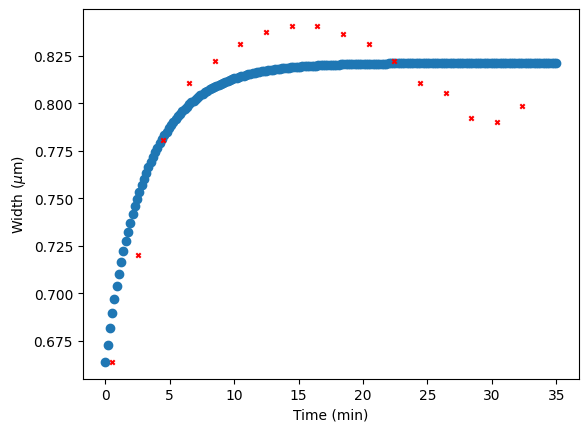

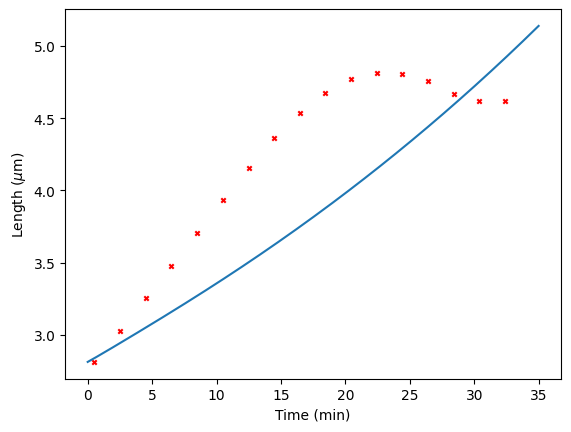

In [7]:
# Plotting
plt.scatter(tspan, 2*sol[:,0], label = 'Width')
plt.scatter(data_time, 2*avg_r, 10,marker='x', color = 'r')
plt.ylabel('Width ($\mu$m)')
plt.xlabel('Time (min)')
plt.show()
plt.plot(tspan, sol[:,1], label = 'Length')
plt.scatter(data_time, avg_L, 10,marker='x', color = 'r')
plt.ylabel('Length ($\mu$m)')
plt.xlabel('Time (min)')
plt.show()
